## データの読み込み

In [ ]:
import requests
from bs4 import BeautifulSoup
import time

def scrape_mynavi_jobs():
    url = "https://tenshoku.mynavi.jp/list/e06/?jobsearchType=4&searchType=8&refLoc=fnc_sra"
    
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }

    try:
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')
        
        
        job_cards = soup.find_all(class_='cassetteRecruit')
        
        if not job_cards:
            print("求人情報が見つかりませんでした。")
            return

        for job in job_cards:
            try:
                
                company_name_elem = job.find(class_='cassetteRecruit__name')
                company_name = company_name_elem.text.strip() if company_name_elem else "情報なし"
                title_elem = job.find(class_='cassetteRecruit__copy')
                title = title_elem.text.strip() if title_elem else "情報なし"
                table = job.find('table', class_='tableCondition')
                salary = "給与情報なし"
                location = "勤務地情報なし"
                if table:
                    rows = table.find_all('tr')
                    for row in rows:
                        th = row.find('th')
                        td = row.find('td')
                        if th and td:
                            if '給与' in th.text:
                                salary = td.text.strip()
                            elif '勤務地' in th.text:
                                location = td.text.strip()
                detail_link = job.find('a', class_='cassetteRecruit__copy')
                detail_url = 'https://tenshoku.mynavi.jp' + detail_link.get('href') if detail_link and detail_link.get('href') else "URLなし"
                print(f"会社名: {company_name}")
                print(f"タイトル: {title}")
                print(f"給与: {salary}")
                print(f"勤務地: {location}")
                print("-" * 50)
            except AttributeError as e:
                print(f"データの取得に失敗: {e}")
                continue
            except Exception as e:
                print(f"予期せぬエラーが発生: {e}")
                continue
            time.sleep(1)
    except requests.exceptions.RequestException as e:
        print(f"リクエストエラーが発生しました: {e}")
    except Exception as e:
        print(f"エラーが発生しました: {e}")
def check_page_structure():
    url = "https://tenshoku.mynavi.jp/list/e06/?jobsearchType=4&searchType=8&refLoc=fnc_sra"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }
    
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    first_card = soup.find(class_='cassetteRecruit')
    if first_card:
        print("求人カードのHTML構造:")
        print(first_card.prettify())
        table = first_card.find('table', class_='tableCondition')
        if table:
            print("\nテーブル部分の構造:")
            print(table.prettify())
    else:
        print("求人カードが見つかりません")

scrape_mynavi_jobs()

会社名: 医療法人社団爽和会 | <お茶の水駿河台クリニック>◆画像診断・内視鏡の専門◆未経験OK
タイトル: 検査専門クリニックの【看護師】夜勤なし／ブランクOK／面接1回
パート・アルバイト
給与: 時給2,100円 ※試用期間3ヶ月あり（その間の待遇面に変更はありません）
勤務地: 【転勤なし】 ★「御茶ノ水駅」から徒歩2分、「新御茶ノ水駅」から徒歩4分の好立地！ ＜お茶の水駿河…
--------------------------------------------------
会社名: 医療法人社団健松会 | 新赤坂クリニック青山★青山一丁目駅徒歩1分の新オフィス
タイトル: クリニック内の【サポートスタッフ】★清掃や検査着の入れ替え等
パート・アルバイト
給与: 時給1,170円〜＋交通費全額支給
勤務地: 【『青山一丁目駅』から徒歩1分！】 住所： 東京都港区南青山2-2-3ヒューリック青山外苑東通ビル…
--------------------------------------------------
会社名: 生活協同組合ユーコープ  | 【通いやすい店舗で活躍】*家庭と仕事の両立*充実のサポート体制
タイトル: 主婦(主夫)歓迎！【コープ共済のご案内スタッフ】＊未経験大歓迎
パート・アルバイト
給与: 日給月給：21万9880円以上＋諸手当＋賞与あり ※年齢・能力を考慮の上、決定します。 ※上記には…
勤務地: 神奈川県横浜市・川崎市内の各店舗で募集 ★ご希望のエリアで就業可能！ ★自宅から近い・通いやすい店…
--------------------------------------------------
会社名: 日本住宅開発株式会社 | 時給1500円～／売上昨年対比130％の成長企業
タイトル: 大阪限定募集！不動産会社の【法務営業】時給1500円～／転勤なし
パート・アルバイト
給与: ■時給1500円〜2000円+交通費全額支給 ※経験・年齢・能力等を考慮の上、優遇します。 ※試用…
勤務地: ★駅チカ徒歩5分！ ★交通費は全額支給します ■大阪本社 大阪府大阪市中央区常盤町2-2-13 大…
--------------------------------------------------
会社名: クロジカノーム株式会社

## DB作成

In [13]:
import sqlite3
import os

if os.path.exists('mynavi_jobs.db'):
    import shutil
    try:
        shutil.copy2('mynavi_jobs.db', 'mynavi_jobs_backup.db')
    except:
        pass
    os.remove('mynavi_jobs.db')
def create_new_jobs_table():
    conn = sqlite3.connect('mynavi_jobs.db')
    cursor = conn.cursor()
    
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS jobs
    (id INTEGER PRIMARY KEY AUTOINCREMENT,
     company_name TEXT,
     title TEXT,
     employment_type TEXT,
     salary TEXT,
     location TEXT,
     attributes TEXT,
     created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP)
    ''')
    
    conn.commit()
    conn.close()

create_new_jobs_table()
print("新しいデータベースを作成しました。")

新しいデータベースを作成しました。


## DB保存用の関数を定義

In [14]:
import sqlite3

def save_job_to_db(company_name, title, employment_type, salary, location):
    conn = sqlite3.connect('mynavi_jobs.db')
    cursor = conn.cursor()
    
    try:
        cursor.execute('''
        INSERT INTO jobs (company_name, title, employment_type, salary, location)
        VALUES (?, ?, ?, ?, ?)
        ''', (company_name, title, employment_type, salary, location))
        
        conn.commit()
        
    except sqlite3.Error as e:
        print(f"データベースエラー: {e}")
        
    finally:
        conn.close()

# データ確認用の関数
def check_saved_data():
    conn = sqlite3.connect('mynavi_jobs.db')
    cursor = conn.cursor()
    
    cursor.execute('SELECT * FROM jobs')
    jobs = cursor.fetchall()
    
    for job in jobs:
        print(f"""
ID: {job[0]}
会社名: {job[1]}
タイトル: {job[2]}
雇用形態: {job[3]}
給与: {job[4]}
勤務地: {job[5]}
登録日時: {job[6]}
{'-' * 50}
        """)
    
    conn.close()

## DBに保存

In [19]:
def scrape_mynavi_jobs():
    url = "https://tenshoku.mynavi.jp/list/e06/?jobsearchType=4&searchType=8&refLoc=fnc_sra"

try:
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    job_cards = soup.find_all(class_='cassetteRecruit')
    
    for job in job_cards:
        try:
            company_name_elem = job.find(class_='cassetteRecruit__name')
            company_name = company_name_elem.text.strip() if company_name_elem else "情報なし"
            
            title_elem = job.find(class_='cassetteRecruit__copy')
            title = title_elem.text.strip() if title_elem else "情報なし"
            table = job.find('table', class_='tableCondition')
            salary = "給与情報なし"
            location = "勤務地情報なし"
            
            if table:
                rows = table.find_all('tr')
                for row in rows:
                    th = row.find('th')
                    td = row.find('td')
                    if th and td:
                        if '給与' in th.text:
                            salary = td.text.strip()
                        elif '勤務地' in th.text:
                            location = td.text.strip()
            employment_type = "パート・アルバイト"
            save_job_to_db(company_name, title, employment_type, salary, location)
            print(f"保存完了: {company_name}")
        
            time.sleep(1)

        except Exception as e:
            print(f"データの処理中にエラーが発生しました: {e}")
            continue

except Exception as e:
    print(f"スクレイピング中にエラーが発生しました: {e}")

スクレイピング中にエラーが発生しました: name 'url' is not defined


In [16]:
import sqlite3

def search_jobs_without_keyword(keyword="学歴不問"):
    conn = sqlite3.connect('mynavi_jobs.db')
    cursor = conn.cursor()

    cursor.execute('''
    SELECT * FROM jobs 
    WHERE title NOT LIKE ?
    ''', (f'%{keyword}%',))
    
    jobs = cursor.fetchall()
    
    if len(jobs) == 0:
        print(f"「{keyword}」が含まれていない求人は見つかりませんでした。")
    else:
        print(f"「{keyword}」が含まれていない求人が{len(jobs)}件見つかりました：\n")
        for job in jobs:
            print(f"""
会社名: {job[1]}
タイトル: {job[2]}
雇用形態: {job[3]}
給与: {job[4]}
勤務地: {job[5]}
登録日時: {job[6]}
{'-' * 50}""")
    
    conn.close()

search_jobs_without_keyword()

「学歴不問」が含まれていない求人は見つかりませんでした。


県別データ件数:
prefecture
東京都                           3
大阪府                           3
福岡県                           3
静岡県                           2
沖縄県                           2
千葉県                           2
宮崎県都                          2
滋賀県                           1
山形県                           1
群馬県                           1
三重県                           1
埼玉県                           1
明石市立市民病院／兵庫県                  1
岩手県滝沢市大釜中道                    1
【本社】宮城県                       1
愛知県                           1
■大阪府                          1
熊本県                           1
◇大阪府                          1
香川県                           1
広島県                           1
神奈川県                          1
大阪府茨木市彩都あさぎ７丁目５番１７号（最寄駅：彩都    1
神奈川県横浜市都                      1
尚文／群馬県                        1
＜東京事務所＞東京都                    1
コウガの森・共和／埼玉県                  1
本社／新潟県                        1
北海道                           1
鹿児島県                          1
[本社]埼玉県             

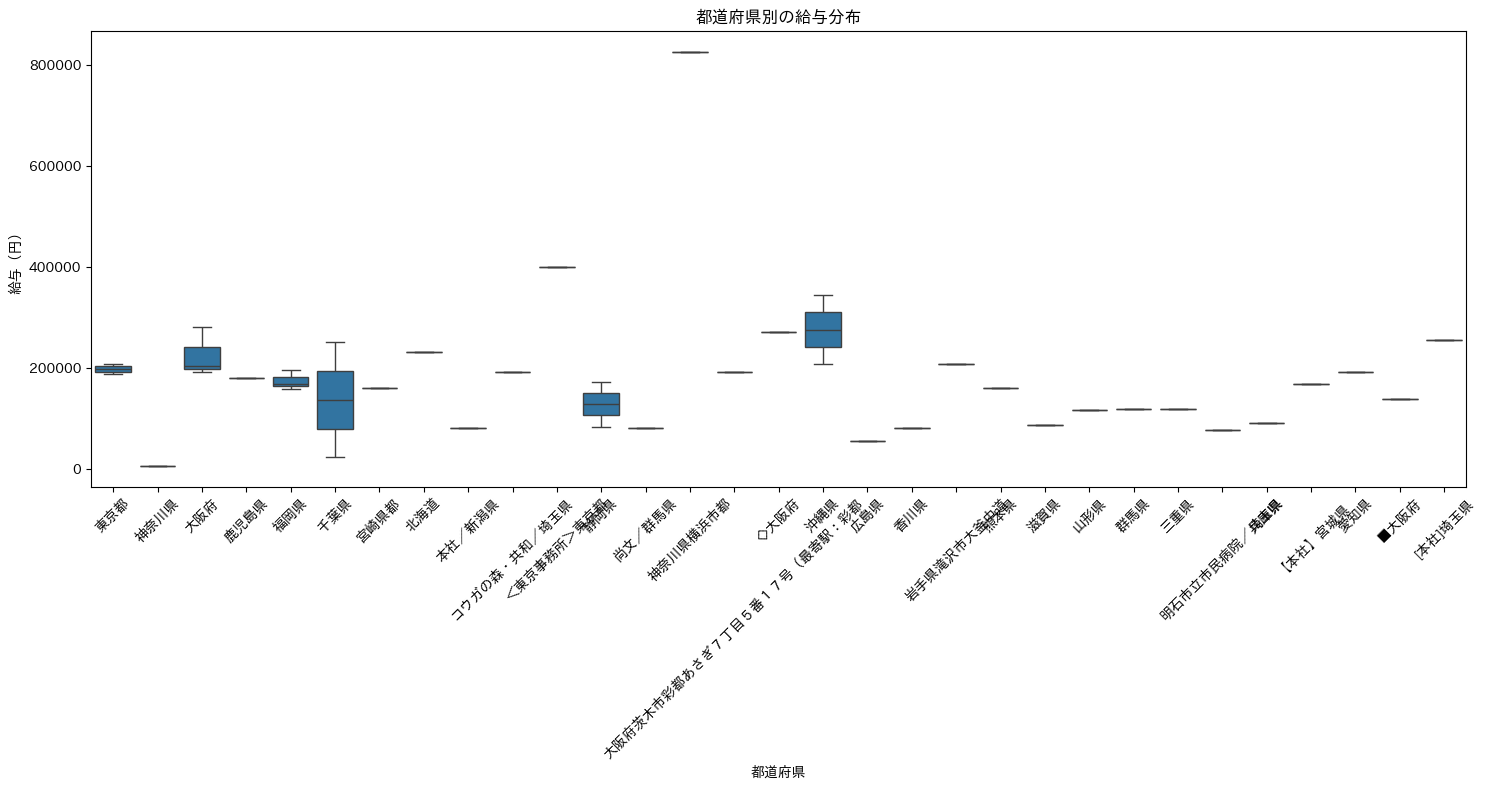

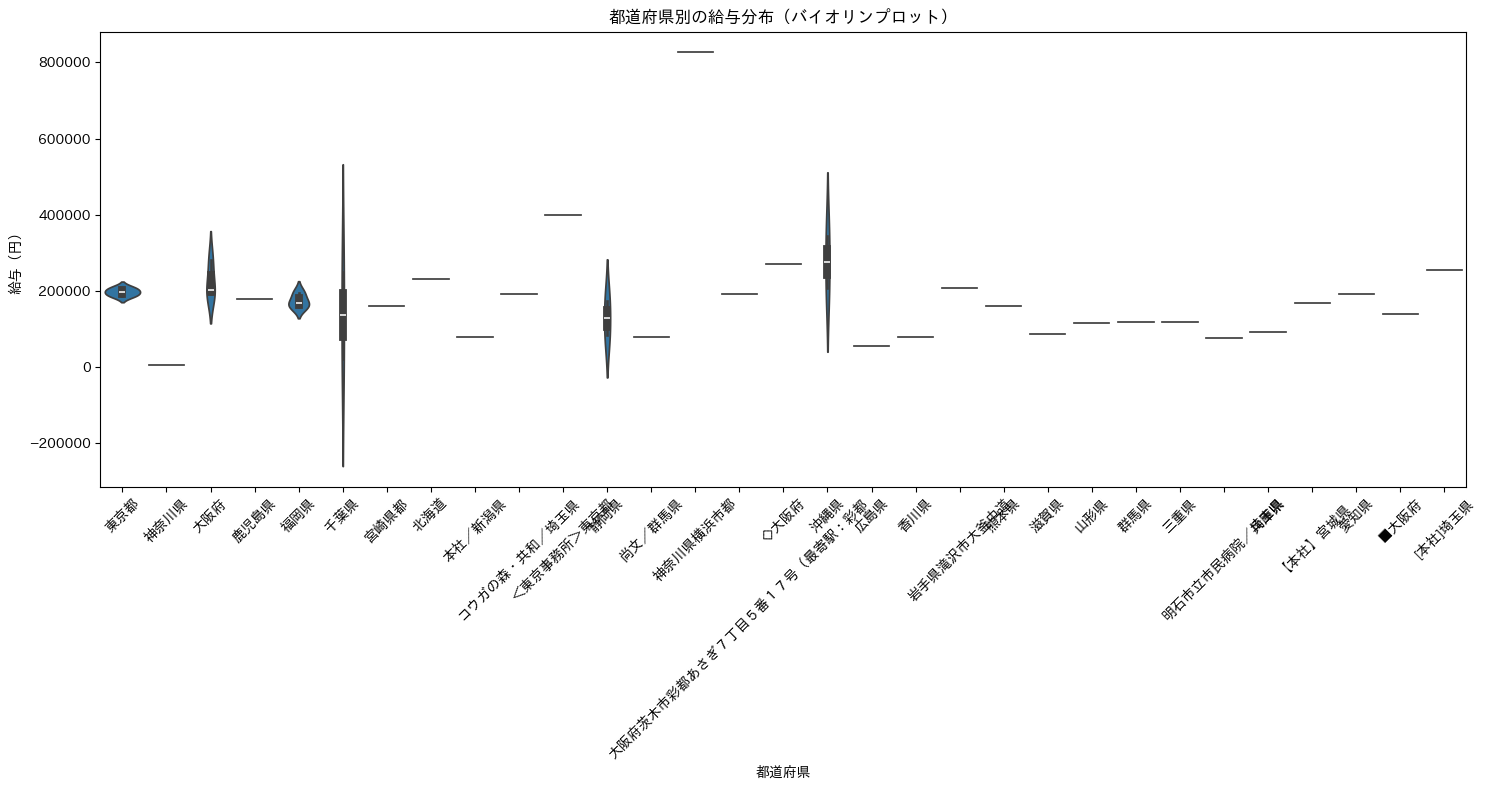

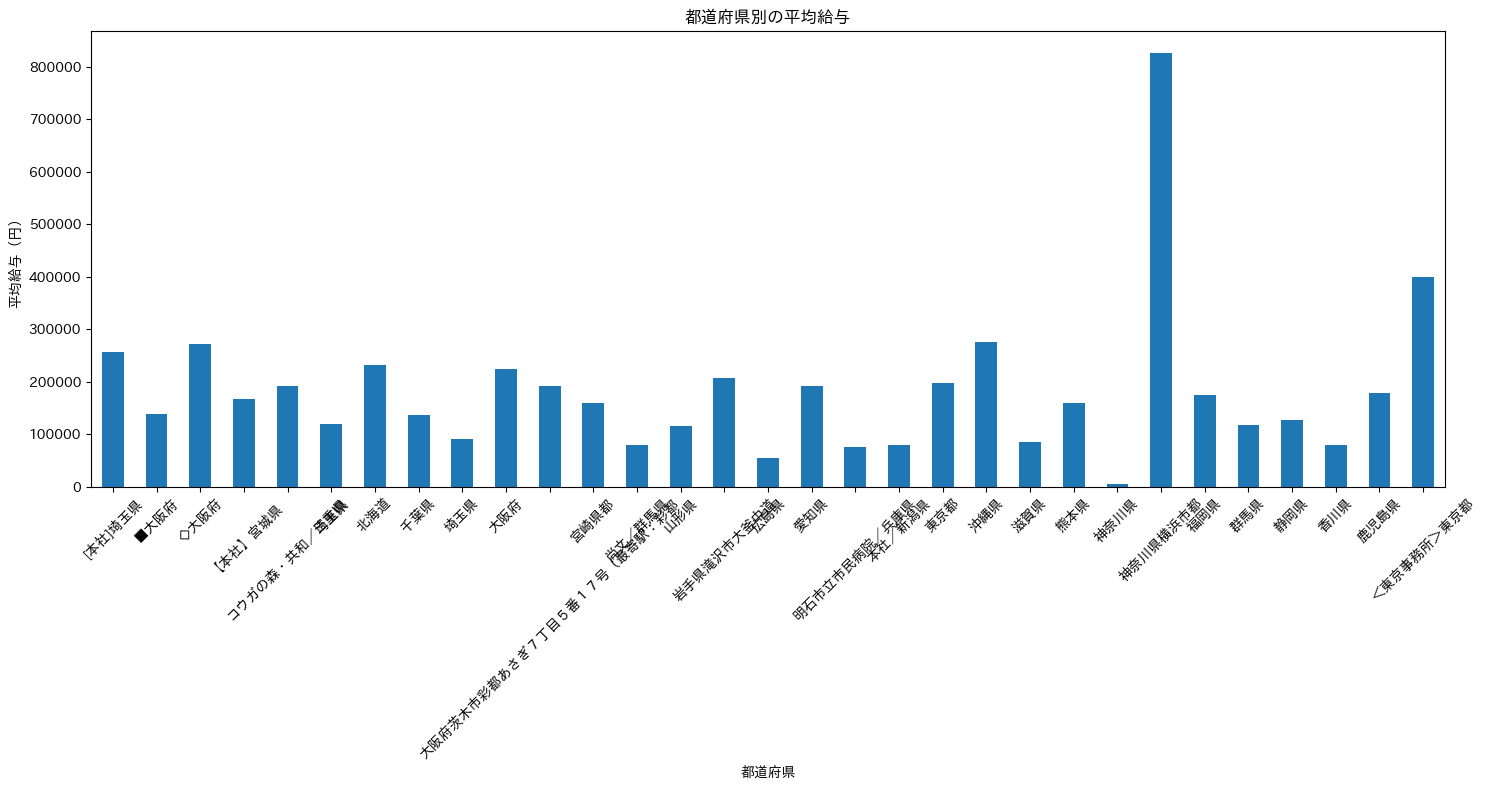

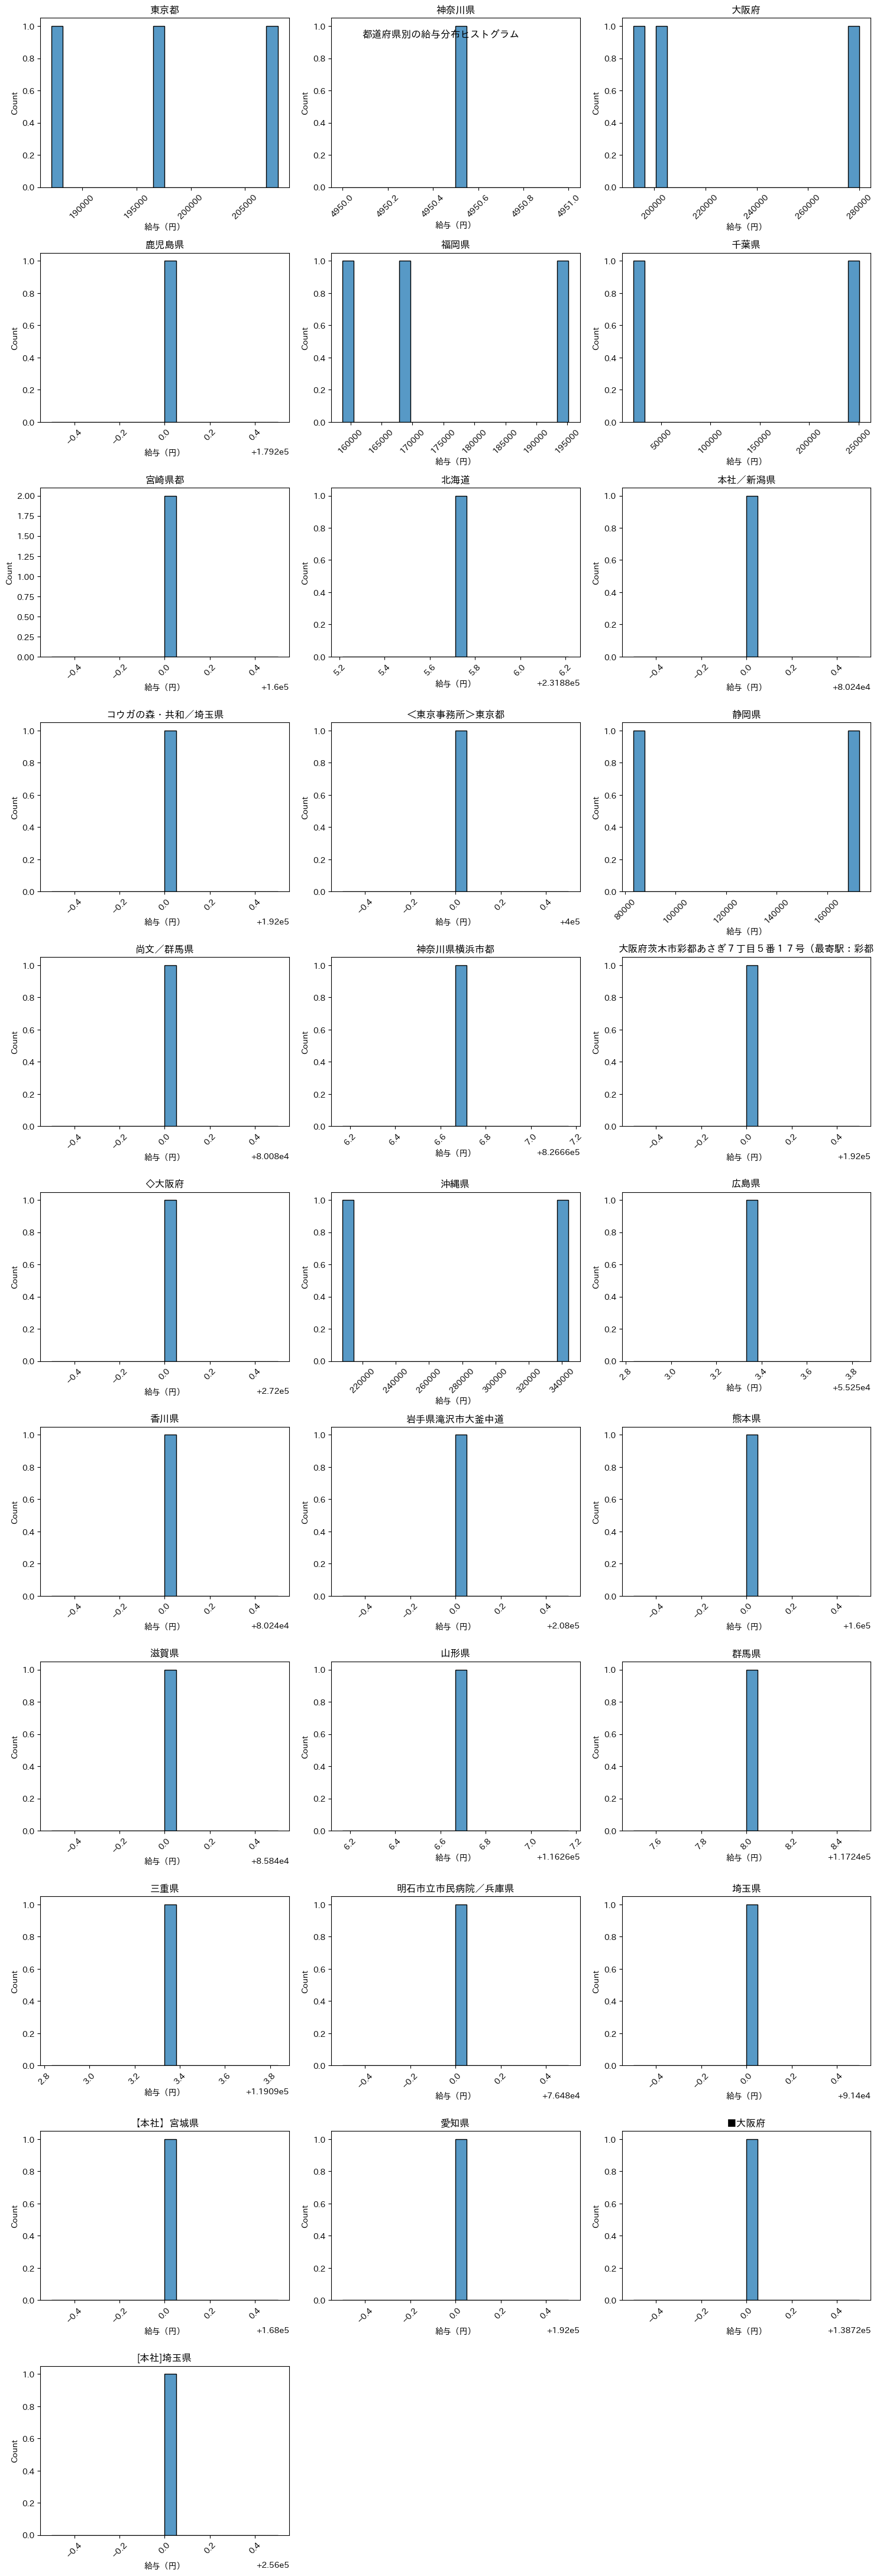


東京都の給与統計:
データ数: 3
平均給与: 197,564円
中央値: 197,493円
標準偏差: 10,400円
最小値: 187,200円
最大値: 208,000円
--------------------------------------------------

神奈川県の給与統計:
データ数: 1
平均給与: 4,950円
中央値: 4,950円
標準偏差: nan円
最小値: 4,950円
最大値: 4,950円
--------------------------------------------------

大阪府の給与統計:
データ数: 3
平均給与: 224,924円
中央値: 202,773円
標準偏差: 48,000円
最小値: 192,000円
最大値: 280,000円
--------------------------------------------------

鹿児島県の給与統計:
データ数: 1
平均給与: 179,200円
中央値: 179,200円
標準偏差: nan円
最小値: 179,200円
最大値: 179,200円
--------------------------------------------------

福岡県の給与統計:
データ数: 3
平均給与: 173,973円
中央値: 168,000円
標準偏差: 18,959円
最小値: 158,720円
最大値: 195,200円
--------------------------------------------------

千葉県の給与統計:
データ数: 2
平均給与: 136,414円
中央値: 136,414円
標準偏差: 161,804円
最小値: 22,001円
最大値: 250,827円
--------------------------------------------------

宮崎県都の給与統計:
データ数: 2
平均給与: 160,000円
中央値: 160,000円
標準偏差: 0円
最小値: 160,000円
最大値: 160,000円
--------------------------------------------------

北海道の給与統計:
データ数: 1
平均給与: 231,

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
import re

def analyze_salary_by_prefecture():
    try:
        conn = sqlite3.connect('mynavi_jobs.db')
        df = pd.read_sql_query("SELECT salary, location FROM jobs", conn)
        conn.close()
        def extract_salary_range(salary_str):
            try:
                numbers = re.findall(r'(\d[\d,]*)', str(salary_str))
                if numbers:
                    numbers = [int(n.replace(',', '')) for n in numbers]
                    if '時給' in str(salary_str):
                        numbers = [n * 8 * 20 for n in numbers]
                    return sum(numbers) / len(numbers)
                return None
            except:
                return None

        df['salary_value'] = df['salary'].apply(extract_salary_range)
        df['prefecture'] = df['location'].str.extract(r'([^\s/]+[都道府県])')
        df = df.dropna(subset=['salary_value', 'prefecture'])
        prefecture_counts = df['prefecture'].value_counts()
        print("県別データ件数:")
        print(prefecture_counts)
        stats_df = df.groupby('prefecture').agg({
            'salary_value': ['count', 'mean', 'median', 'std', 'min', 'max']
        }).round(0)
        
        stats_df.columns = ['件数', '平均給与', '中央値', '標準偏差', '最小値', '最大値']
        print("\n県別統計情報:")
        print(stats_df)

        # 1. 箱ひげ図（全県比較）
        plt.figure(figsize=(15, 8))
        sns.boxplot(data=df, x='prefecture', y='salary_value')
        plt.title('都道府県別の給与分布')
        plt.xlabel('都道府県')
        plt.ylabel('給与（円）')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # 2. バイオリンプロット（分布の形状も表示）
        plt.figure(figsize=(15, 8))
        sns.violinplot(data=df, x='prefecture', y='salary_value')
        plt.title('都道府県別の給与分布（バイオリンプロット）')
        plt.xlabel('都道府県')
        plt.ylabel('給与（円）')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # 3. 県ごとの平均給与バーチャート
        plt.figure(figsize=(15, 8))
        stats_df['平均給与'].plot(kind='bar')
        plt.title('都道府県別の平均給与')
        plt.xlabel('都道府県')
        plt.ylabel('平均給与（円）')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # 4. 県ごとのヒストグラム（サブプロット）
        prefectures = df['prefecture'].unique()
        n_prefectures = len(prefectures)
        
        # サブプロットのグリッドサイズを計算
        n_cols = 3
        n_rows = (n_prefectures + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
        fig.suptitle('都道府県別の給与分布ヒストグラム')
        
        for idx, prefecture in enumerate(prefectures):
            row = idx // n_cols
            col = idx % n_cols
            ax = axes[row, col] if n_rows > 1 else axes[col]
            
            prefecture_data = df[df['prefecture'] == prefecture]['salary_value']
            sns.histplot(data=prefecture_data, bins=20, ax=ax)
            ax.set_title(prefecture)
            ax.set_xlabel('給与（円）')
            ax.tick_params(axis='x', rotation=45)
        for idx in range(n_prefectures, n_rows * n_cols):
            row = idx // n_cols
            col = idx % n_cols
            ax = axes[row, col] if n_rows > 1 else axes[col]
            ax.set_visible(False)

        plt.tight_layout()
        plt.show()

        # 5. 統計情報の詳細表示
        for prefecture in prefectures:
            prefecture_data = df[df['prefecture'] == prefecture]['salary_value']
            print(f"\n{prefecture}の給与統計:")
            print(f"データ数: {len(prefecture_data)}")
            print(f"平均給与: {prefecture_data.mean():,.0f}円")
            print(f"中央値: {prefecture_data.median():,.0f}円")
            print(f"標準偏差: {prefecture_data.std():,.0f}円")
            print(f"最小値: {prefecture_data.min():,.0f}円")
            print(f"最大値: {prefecture_data.max():,.0f}円")
            print("-" * 50)

    except Exception as e:
        print(f"エラーが発生しました: {e}")
        import traceback
        print(traceback.format_exc())
analyze_salary_by_prefecture()